In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn import preprocessing

In [2]:
# load the boston data
boston = load_boston()
data_X = pd.DataFrame(boston.data)

data_X.shape

(506, 13)

In [3]:
#show the dataset 
data_X.columns = boston.feature_names
data_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Adding target variable 
data_y = pd.DataFrame(boston.target)
data_y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
# Split data into training and test datasets. 
from sklearn.model_selection import train_test_split
training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(data_X, data_y, test_size = 0.20)

# Preprocessing

### Standardization (z-score)
Standardization is a scaling technique to change numeric values. Standardization can be helpful in cases where the data follows Gaussian distribution. However, this theory is not always right, so you have to check the experiment with both Standardization and normalization to find out which is better for the model. 

```
X_new = (X - mean)/Std
```

### Normalization (Min Max Scaling)
Normalization is a scaling technique to change numeric data between 0 and 1. Generally, it can be used if the data does not follow Gaussian distribution, but not always necessary.

```
X_new = (X - X_min)/(X_max - X_min)
```

In [6]:
# Standardization. 
training_dataset_x = preprocessing.scale(training_dataset_x)
test_dataset_x = preprocessing.scale(test_dataset_x)

# Normalize data. 
# normalized_training_dataset_x = preprocessing.normalize(training_dataset_x)
# normalized_test_dataset_x = preprocessing.normalize(test_dataset_x)

# Modeling

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import tensorflow_addons as tfa

model = Sequential(name="BostonHousingPrices")
model.add(Dense(100, input_dim=13, activation="relu", name="Hidden-1"))
model.add(Dense(100, activation="relu", name="Hidden-2"))
model.add(Dense(1, activation="linear", name="Output"))

# *input_dim is number of features. 

### Loss function (Cost Function/Error Function)
The loss function is the algorithm to optimize the parameter by iteratively returning the difference (error) between actual and predicted data. It is important in machine/deep learning to measure how wrong the model is when evaluating actual and evaluated value. In the above code, "loss" argument specifies loss function and MSE, one of the loss functions, (Mean Squared Error) is specified. 

### MAE (Mean Absolute Error)
The Mean Absolute Error is the average of all absolute errors. The number range will depend on the dataset and its degree. However, the smaller the MAE, the more accurate the prediction model is. 

### MSE (Mean Square Error)
MSE is a regression metric measuring loss which is difference between actual and predicted values. As the loss shows how bad a prediction model is, the lower, the more accurate the model. 

### RMSE (Roo Mean Square Erro)
RMSE is the square root of MSE and explains how far predictions fall from measured true values. 

### R Square (Correlation of Determination)
R Square explains how well the relationship betweeen independent and dependent values. It is between 0 and 1. The bigger the value, the more accurate the model is. R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. You will never see 100% of R Square because prediction model cannot be 100%. 

In [8]:
from keras import backend as K

# Define R2 metric. 
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


model.compile(
    optimizer='rmsprop', 
    loss='mse', 
    metrics=[
        'mae', 
        'mse', 
        tf.keras.metrics.RootMeanSquaredError(),
        coeff_determination, 
    ])

# Compile defines the loss function, the optimizer and the metrics. 
# Optimizer: It is a function or algorithm tha modifies the attirubes of the network, such as weights and learning rate. 
# loss: It's a loss function.
# metrics: Method to evaluate. 

In [9]:
%%capture
# Training with standardized training dataset. 
hist = model.fit(
    training_dataset_x, 
    training_dataset_y, 
    batch_size=32, 
    epochs=1000, 
    validation_split=0.3
)

In [10]:
hist.history.keys()

dict_keys(['loss', 'mae', 'mse', 'root_mean_squared_error', 'coeff_determination', 'val_loss', 'val_mae', 'val_mse', 'val_root_mean_squared_error', 'val_coeff_determination'])

In [11]:
# Evaluation with standardized dataset. 
evaluate_result = model.evaluate(test_dataset_x, test_dataset_y)
zipped_result = pd.DataFrame(zip(hist.history.keys(), evaluate_result))

zipped_result.columns = ['params', 'model']
zipped_result

4/4 [==============================] - 0s 2ms/step - loss: 17.0410 - mae: 2.9289 - mse: 17.0410 - root_mean_squared_error: 4.1281 - coeff_determination: 0.8024


,params,model
0,loss,17.041023
1,mae,2.928895
2,mse,17.041023
3,root_mean_squared_error,4.128078
4,coeff_determination,0.802361


### Training loss (loss)
The training loss is a metric to evalute how well the deep learning model predict data in regression with training dataset. 

### Validation loss (val_loss)
The validation loss is the same metric with training loss, but it uses validation dataset which is unseen and unbiased dataset. 

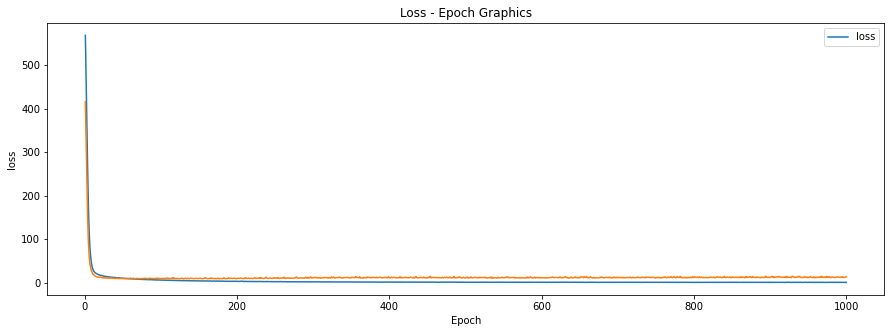

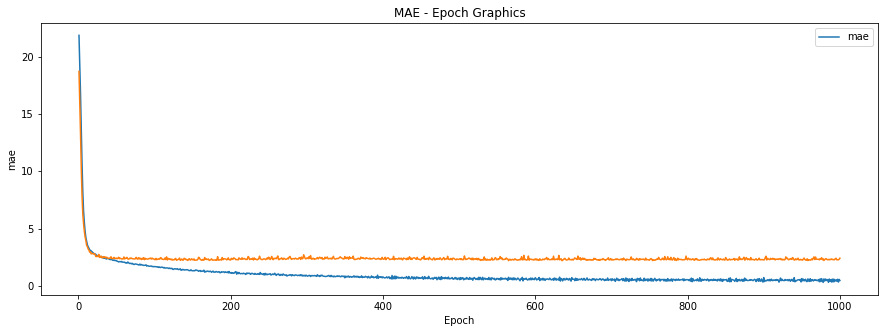

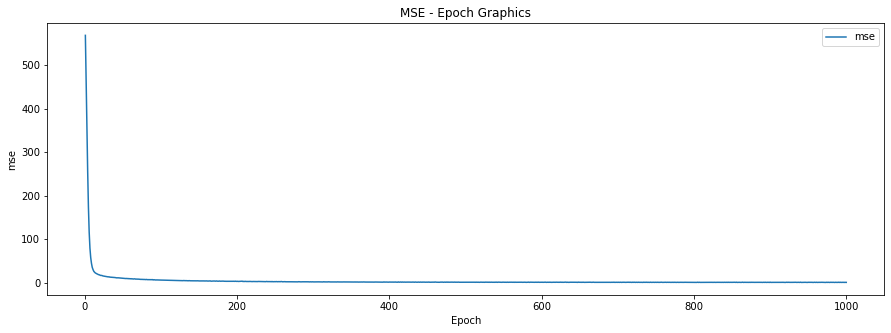

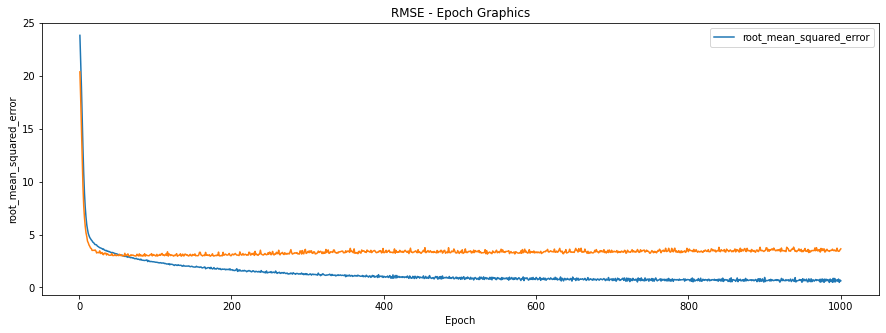

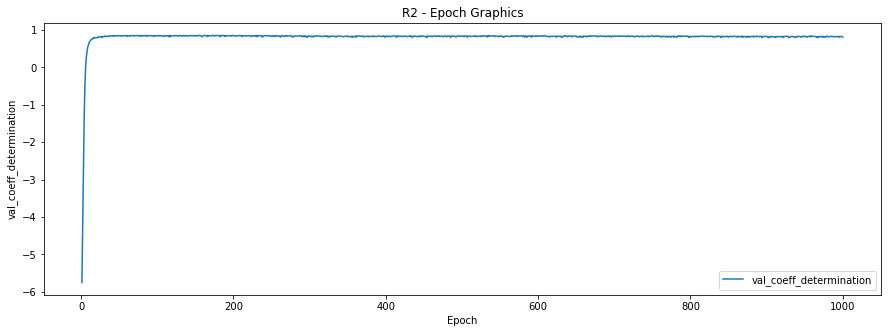

In [17]:
import matplotlib.pyplot as plt

# Graphic function. 
def graphing(hist_object, title, x_label, y_label, val_value=False): 
    figure = plt.gcf()
    figure.set_size_inches((15, 5))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(range(1, len(hist_object.history[y_label]) + 1), hist_object.history[y_label])

    if (val_value != False): 
        plt.plot(range(1, len(hist_object.history[val_value]) + 1), hist_object.history[val_value])
        
    plt.legend([y_label])
    plt.show()
    
graphing(hist, 'Loss - Epoch Graphics', 'Epoch', 'loss', 'val_loss')
graphing(hist, 'MAE - Epoch Graphics' , 'Epoch', 'mae' , 'val_mae')
graphing(hist, 'MSE - Epoch Graphics' , 'Epoch', 'mse')
graphing(hist, 'RMSE - Epoch Graphics' , 'Epoch', 'root_mean_squared_error', 'val_root_mean_squared_error')
graphing(hist, 'R2 - Epoch Graphics' , 'Epoch', 'val_coeff_determination')

# AutoML with AutoKeras

In [29]:
import autokeras

auto_keras_model = autokeras.StructuredDataRegressor(
    column_names=None,
    column_types=None,
    output_dim=None,
    loss="mean_squared_error", # Define loss function. 
    metrics=[
        tf.keras.metrics.MeanAbsoluteError(), 
        tf.keras.metrics.MeanSquaredError(), 
        tf.keras.metrics.RootMeanSquaredError(), 
        # coeff_determination, 
    ],  # Metrics to evaluate the model. 
    project_name="Boston Housing Prediction",
    max_trials=10,             # Maximum number of different Keras Modesl to try. 
    directory=None,            # The path to a directory for storing the search output. 
    objective="val_loss",
    tuner=None,
    overwrite=False,
    seed=None,
    max_model_size=None,
)

INFO:tensorflow:Reloading Oracle from existing project .\Boston Housing Prediction\oracle.json
INFO:tensorflow:Reloading Tuner from .\Boston Housing Prediction\tuner0.json


In [30]:
%%capture
%%time
auto_keras_hist = auto_keras_model.fit(
    x=training_dataset_x, 
    y=training_dataset_y, 
    epochs=1000, 
    validation_split=0.3
)

INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Assets written to: .\Boston Housing Prediction\best_model\assets


In [31]:
auto_keras_hist.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'root_mean_squared_error'])

In [32]:
# Evaluate. 
auto_keras_evaluate_result = auto_keras_model.evaluate(test_dataset_x, test_dataset_y)
auto_keras_zipped_result = pd.DataFrame(zip(auto_keras_hist.history.keys(), auto_keras_evaluate_result))
auto_keras_zipped_result.columns = ['Params', 'AutoKeras']
auto_keras_zipped_result

4/4 [==============================] - 0s 0s/step - loss: 51.4745 - mean_absolute_error: 5.8008 - mean_squared_error: 51.4745 - root_mean_squared_error: 7.1746


,Params,AutoKeras
0,loss,51.474461
1,mean_absolute_error,5.800849
2,mean_squared_error,51.474461
3,root_mean_squared_error,7.174571


In [33]:
# Compare with simple model and autokeras. 
pd.concat([zipped_result, auto_keras_zipped_result['AutoKeras']], axis=1)

,params,model,AutoKeras
0,loss,17.041023,51.474461
1,mae,2.928895,5.800849
2,mse,17.041023,51.474461
3,root_mean_squared_error,4.128078,7.174571
4,coeff_determination,0.802361,NaN


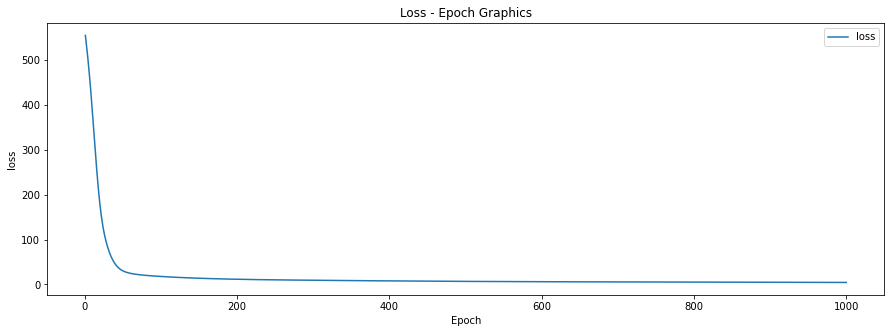

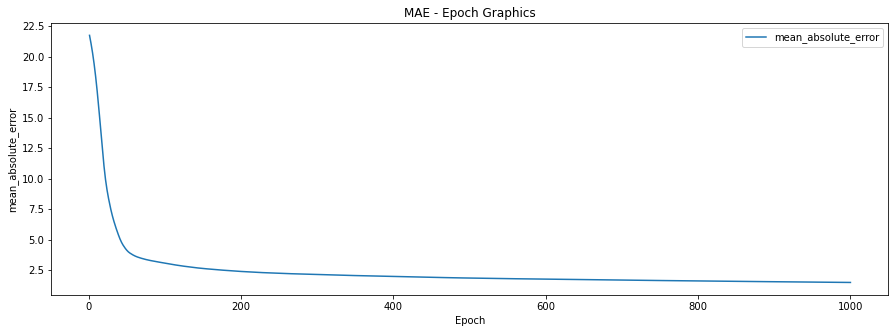

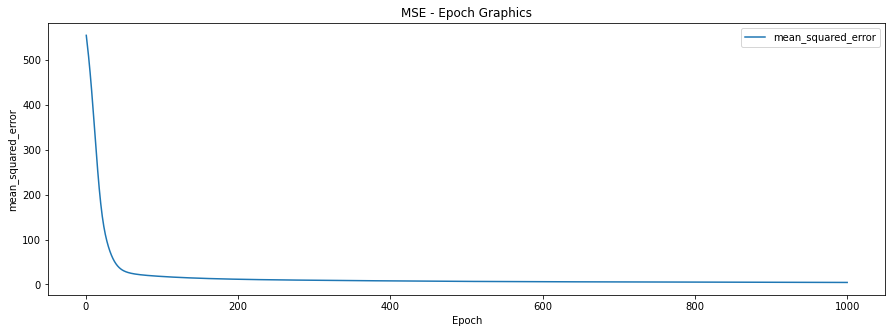

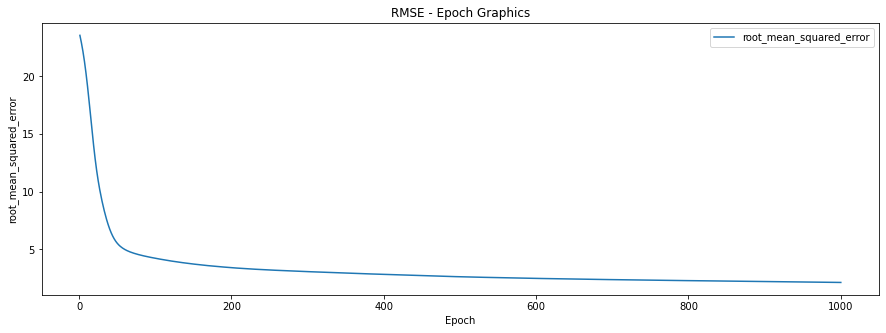

In [34]:
# Showing graphs. 
graphing(auto_keras_hist, 'Loss - Epoch Graphics', 'Epoch', 'loss')
graphing(auto_keras_hist, 'MAE - Epoch Graphics' , 'Epoch', 'mean_absolute_error')
graphing(auto_keras_hist, 'MSE - Epoch Graphics' , 'Epoch', 'mean_squared_error')
graphing(auto_keras_hist, 'RMSE - Epoch Graphics', 'Epoch', 'root_mean_squared_error')

In [40]:
auto_keras_saved_model = auto_keras_model.export_model()

In [41]:
auto_keras_saved_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 13)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                448       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 regression_head_1 (Dense)   (None, 1)                 33    

# Prediction

In the below graph, x axis is predicted value and y axis are actual value. If the scatter graph looks growing from left to right, the predicted values are more accurate. 

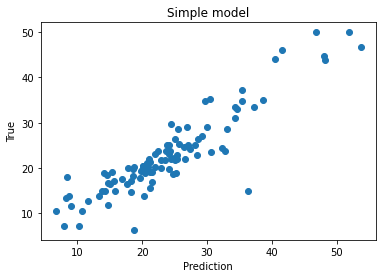

4/4 [==============================] - 0s 4ms/step


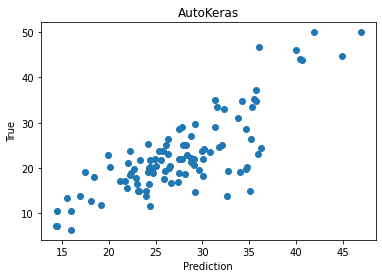

In [46]:
pred_result = model.predict(test_dataset_x)

plt.scatter(pred_result, test_dataset_y)
plt.title('Simple model')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()

auto_keras_pred_result = auto_keras_model.predict(test_dataset_x)

plt.scatter(auto_keras_pred_result, test_dataset_y)
plt.title('AutoKeras')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()